# STA 208: Homework 3 (Do not distribute)

__Instructions:__ Submit it on canvas.  The canvas should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand when you hand it in.  Submit each file separately.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (10 pts)

Recall that surrogate losses for large margin classification take the form, $\phi(y_i x_i^\top \beta)$ where $y_i \in \{-1,1\}$ and $\beta, x_i \in \mathbb R^p$.

The following functions are used as surrogate losses for large margin classification.  Demonstrate if they are convex or not, and follow the instructions.

1. exponential loss: $\phi(x) = e^{-x}$
1. truncated quadratic loss: $\phi(x) = (\max\{1-x,0\})^2$
1. hinge loss: $\phi(x) = \max\{1-x,0\}$
1. sigmoid loss: $\phi(x) = 1 - \tanh(\kappa x)$, for fixed $\kappa > 0$
1. Plot these as a function of $x$.

(This problem is due to notes of Larry Wasserman.) 


1. Exponential loss is convex obviously. We know that $\nabla^2 \phi(x)$ is always larger than zero, so $x^T \nabla^2 \phi(x)x\geq 0$ for any $x$.

2. Truncated quadratic loss is convex. At the point $x=0$, we know that the gradient is 0, so the function is smooth and the two-order gradient is 2 when $x<1$ and 0 when $x\geq1$, which is always larger than or equal to zero, so $x^T \nabla^2 \phi(x)x\geq 0$ for any $x$.

3. Hinge loss is convex but not differentiable. If $x_0$ and $x_1$ are both less than 1 or large than 0, then $\phi(\alpha x_0+(1-\alpha) x_1)) = \alpha \phi(x_0)+(1-\alpha)\phi(x_1)$. If $x_0<1$ and $x_1>1$, then $\alpha \phi(x_0)+(1-\alpha)\phi(x_1) = \alpha (1-x_0)$ and $\phi(\alpha x_0+(1-\alpha) x_1)) $ is 0 or $1-\alpha x_0-(1-\alpha)x_1$. Notice that $\alpha (1-x_0) - (1-\alpha x_0-(1-\alpha)x_1)=(1-\alpha)(1-x_1)>0$, so $\phi(\alpha x_0+(1-\alpha) x_1)) \leq \alpha \phi(x_0)+(1-\alpha)\phi(x_1)$.

4. Sigmoid loss is not convex. Let $x_0 = 0$, $x_1 = -1$, $\alpha = 0.5$. We get $\phi(-0.5) = 1.46 \geq 1.38 = 0.5\phi(0)+0.5\phi(-1)$, so it is not convex.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

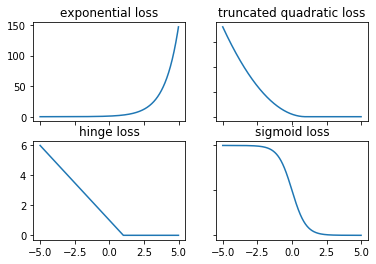

In [14]:
X = [0.01*i for i in range(-500,500)]
y1 = np.exp(X)
y4 =  1 - np.tanh(X)
y2,y3 = [],[]
for i in X:
    if 1-i < 0:
        y2.append(0)
        y3.append(0)
    else:
        y2.append((1-i)**2)
        y3.append(1-i)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(X, y1)
axs[0, 0].set_title('exponential loss')
axs[0, 1].plot(X, y2)
axs[0, 1].set_title('truncated quadratic loss')
axs[1, 0].plot(X, y3)
axs[1, 0].set_title('hinge loss')
axs[1, 1].plot(X, y4)
axs[1, 1].set_title('sigmoid loss')
for ax in fig.get_axes():
    ax.label_outer()

__Exercise 2__ (20 pts)

Consider the truncated quadratic loss from (1.1.2).  For brevity let $a_+ = max\{a,0\}$ denote the positive part of $a$.

$$\ell(y_i,x_i,\beta) = \phi(y_i x_i^\top \beta) = (1-y_i x_i^\top \beta)_+^2$$

1. Consider the empirical risk, $R_n$ (the average loss over a training set) for the truncated quadratic loss.  What is gradient of $R_n$ in $\beta$?  Does it always exists?
1. Demonstrate that the gradient does not have continuous derivative everywhere.
1. Recall that support vector machines used the hinge loss $(1 - y_i x_i^\top \beta)_+$ with a ridge regularization.  Write the regularized optimization method for the truncated quadratic loss, and derive the gradient of the regularized empirical risk.
1. In quasi-Newton methods a matrix ($Q$) that is a surrogate for the Hessian of the objective $L$ is used to determine step direction.

$$
\beta \gets \beta - Q^{-1} \nabla L(\beta)
$$


Because the loss does not have continuous Hessian, instead of the Newton method, we will use a quasi-Newton method that replaces the Hessian with a quasi-Hessian (another matrix that is meant to approximate the Hessian).  Consider the following quasi-Hessian of the regularized objective to be $$G(\beta) = \frac 1n \sum_i 2 (x_i x_i^\top 1\{ y_i x_i^\top \beta < 1 \}) + 2 \lambda I.$$  Demonstrate that the quasi-Hessian is positive definite, and write pseudo-code for quasi-Newton optimization, comment on the computational complexity of this method.

1. $R_n = \frac1n \sum_n \ell(y_i,x_i,\beta) = \frac1n \sum_n (1-y_i x_i^\top \beta)_+^2$. The gradient of $R_n$ is
$$\frac{\partial R_n}{\partial \beta} = \frac2n \sum_n -y_i(1-y_i x_i^\top \beta)_+ x_i$$
The truncated quadratic loss is smooth, so it always exists.

2. For the function $a_+ = max\{a,0\}$, it is not differentiable at the points $\beta$ where $1-y_i x_i^\top \beta$.  
\begin{equation}
\frac{\partial^2 R_n}{\partial \beta^2}=\left\{
\begin{aligned}
0  && 1-y_i x_i^\top \beta < 0 \\
y_i^2x_ix_i^\top  & &1-y_i x_i^\top \beta >0 \\
\end{aligned}
\right.
\end{equation}
So, the gradient does not have continuous derivative at some points..

3. The regularized optimization method for the truncated quadratic loss is to find $\beta$, such that
$$\min_{\beta} \frac1n \sum_n (1-y_i x_i^\top \beta)_+^2 + \lambda \sum_{j=1}^p\beta_j^2$$
The gradient is 
$$\frac2n \sum_n -y_i(1-y_i x_i^\top \beta)_+ x_i + 2\lambda \beta$$

4.  Notice that

$$x_jG(\beta)x_j^\top = x_j (\frac 1n \sum_i 2 (x_i x_i^\top 1\{ y_i x_i^\top \beta < 1 \}) + 2 \lambda I )x_j^\top = \frac 1n x_j \sum_i 2 (x_i x_i^\top 1\{ y_i x_i^\top \beta < 1 \})x_j^\top + 2 x_j \lambda x_j^\top$$
$$x_jG(\beta)x_j^\top  = \frac 1n \sum_i 2 (x_j x_i x_i^\top x_j^\top 1\{ y_i x_i^\top \beta < 1 \}) + 2 x_j \lambda x_j^\top$$
$$= \frac 1n \sum_i 2 (x_j x_i (x_j x_i)^\top 1\{ y_i x_i^\top \beta < 1 \}) + 2 x_j \lambda x_j^\top$$
$$= \frac 1n \sum_{\{ y_i x_i^\top \beta < 1 \})} 2 (x_j x_i (x_j x_i)^\top + 2 \lambda x_j x_j^\top   $$
It is equal to the sum of several positive definite matrices, which means it is a positive definite matrix.

For a given $f(\beta)$ that is twice-differentiable:
1. Choose a starting point  $\beta_0$
2. Calculate search direction by computing  $G(\beta)$ and computing $\nabla f(\beta)$
3. Calculate change in  $\beta$  using the following equation:

$$ \beta^{k+1} = \beta^k - G(\beta)^{-1}_k * \nabla f(\beta) $$
4. Determine new  $\beta$ value
5. Determine if method has converged using convergence criteria (gradient)
6. Repeat from step 2 if not optimum

The computational complexity is $O(np^2)$.

**Exercise 3 (20 pts)**

Consider the simulation below.

1. Implement minibatch stochastic gradient descent using the truncated quadratic loss.  Access the data by iteratively calling the ``sim_data`` method below.  

2. With minibatch size of $1$ (SGD).  Vary to learning schedule to be constant, decaying with $\eta_t \propto t**{-1/2}$, and $\eta_t \propto t^{-1}$.  Compare with normal noise (the ``noise_dis`` parm).

3. Vary the minibatch size to see the change in performance, with the best learning schedule from 2. When you compare two methods, make sure that you compare them with the same amount of data accessed (so use 1:10 ratio of iterations if you are comparing a minibatch ratio of 10:1).

4. Redo 2, 3 with ``noise_dis`` set to ``"chisquare"``.

In [190]:
class DataSimulator:
    """
    Simulate the data for linear classification
    """
    def __init__(self,p,noise_dist = "normal"):
        self.beta = np.random.normal(0,1,p)
        self.noise_dist = noise_dist
        self.p = p
        
    def sim_data(self,m = 1):
        p = self.p
        X = np.random.normal(0,1,(m,p))
        if self.noise_dist == "normal":
            eps = np.random.normal(0,1,m)
        if self.noise_dist == "chisquare":
            eps = np.random.chisquare(1,m)
        z = X @ self.beta + eps
        y = 1*(z > 0)
        return X, y

In [191]:
ds = DataSimulator(10)
#ds.sim_data(m=10)

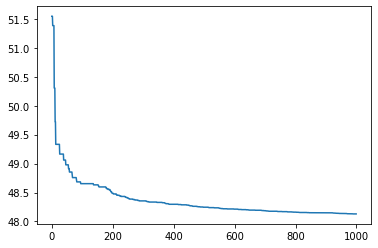

In [112]:
def max_fun(x):
    if x < 0:
        return 0
    else:
        return x

def grad_descent(X,y,T, m, C, gamma):
    """
    ds: data simulator
    T: number of iterations
    m: minibatch size
    beta_start: init beta
    C, gamma : eta_t = C t^(-gamma)
    """
    
    losses = [] # tracks loss at each time   np.random.choice(n, 1)
    betas = [] # tracks betas at each time
    n,p = X.shape 
    beta_start = np.zeros(p) -2
    
    for t in range(T):
        i_list = list(np.random.choice(n, m))
        grad = np.zeros(p)
        for i in i_list:
            grad += -2* y[i] * max_fun(1 - y[i] * X[i,:].T @ beta_start) * X[i,:] / m
        beta_new = beta_start - C * (t+1) ** (-gamma) * grad
        betas.append(beta_new)
        R_n = 0
        for j in range(n):
            R_n += max_fun(1-y[j]*X[j,:].T @ beta_new) ** 2/n
        losses.append(R_n)
        beta_start = beta_new
    return  betas,losses

T = 1000
m = 1
C = 0.1
gamma = 1
X,y = ds.sim_data(m=10)
betas,losses = grad_descent(X,y,T, m,C,gamma)

beta_true = ds.beta
perf = [np.sum((beta- beta_true)**2) for beta in betas]
plt.plot(np.arange(T)*m, perf)


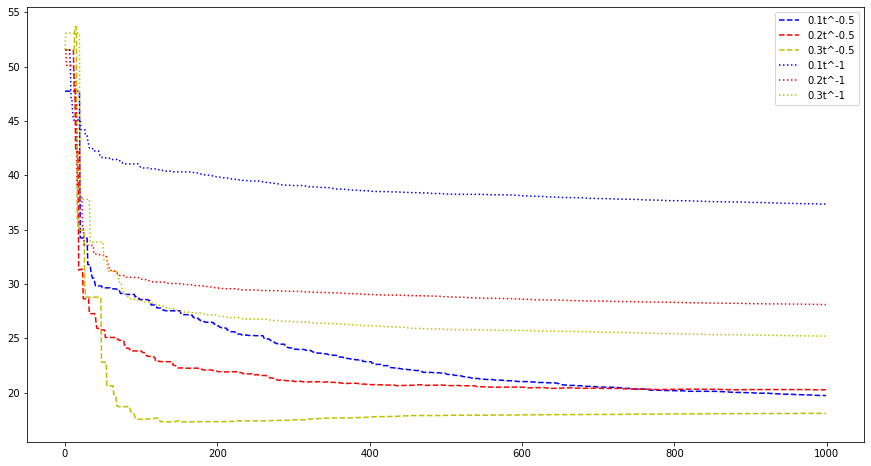

In [135]:
gamma_list = [1/2,1]
C_list = [0.1*(i+1) for i in range(3)]
color = ['b','r','y']
typ = [ '--',':']
beta_true = ds.beta
X,y = ds.sim_data(m=10)
plt.figure(figsize=(15,8))
for j in range(2):
    for i in range(3):
        C = C_list[i]
        gamma = gamma_list[j]
        betas,losses = grad_descent(X,y,T, m, C ,gamma)
        perf = [np.sum((beta- beta_true)**2) for beta in betas]
        plt.plot(np.arange(T)*m, perf, label=str(round(C,1))+ 't^'+str(-gamma),ls = typ[j], color = color[i])

plt.legend()

<Figure size 1080x576 with 0 Axes>

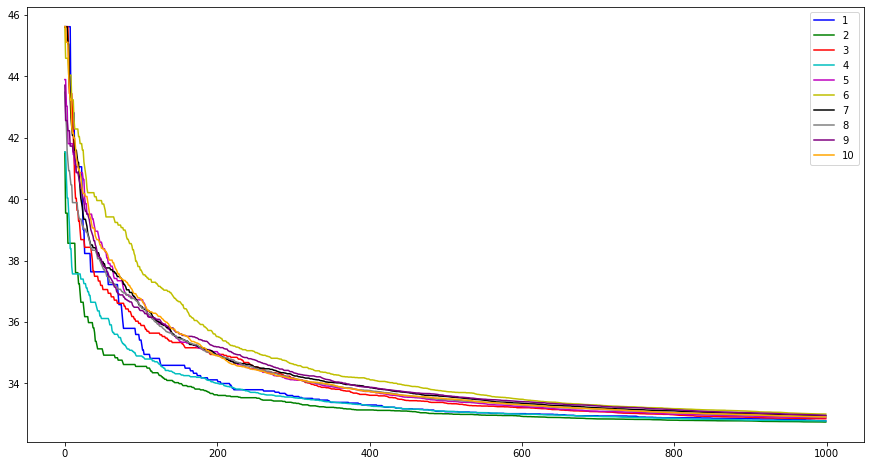

In [218]:
mini = [i+1 for i in range(10)]
X,y = ds.sim_data(m=10)
plt.figure(figsize=(15,8))
C = 0.03
gamma = 0.5
color = ['b','g','r','c','m','y','k','grey','purple','orange']
beta_true = ds.beta
plt.figure(figsize=(15,8))
for num in range(10):
    m = mini[num]
    betas,losses = grad_descent(X,y,T,m,C,gamma)
    perf = [np.sum((beta- beta_true)**2) for beta in betas]
    plt.plot(np.arange(T), perf, label=str(m),color = color[num])

plt.legend()

In [219]:
class DataSimulator:
    """
    Simulate the data for linear classification
    """
    def __init__(self,p,noise_dist = "chisquare"):
        self.beta = np.random.normal(0,1,p)
        self.noise_dist = noise_dist
        self.p = p
        
    def sim_data(self,m = 1):
        p = self.p
        X = np.random.normal(0,1,(m,p))
        if self.noise_dist == "normal":
            eps = np.random.normal(0,1,m)
        if self.noise_dist == "chisquare":
            eps = np.random.chisquare(1,m)
        z = X @ self.beta + eps
        y = 1*(z > 0)
        return X, y
ds = DataSimulator(10)

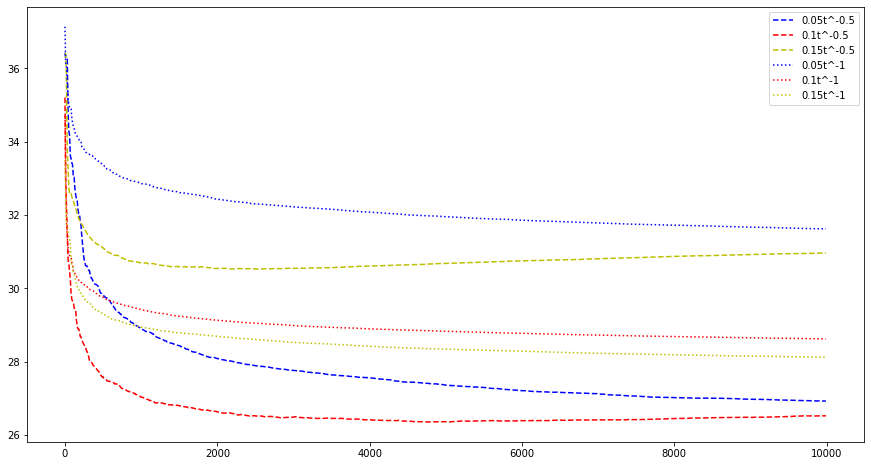

In [229]:
gamma_list = [1/2,1]
C_list = [0.05*(i+1) for i in range(3)]
color = ['b','r','y']
typ = [ '--',':']
beta_true = ds.beta
X,y = ds.sim_data(m=10)
plt.figure(figsize=(15,8))
for j in range(2):
    for i in range(3):
        C = C_list[i]
        gamma = gamma_list[j]
        betas,losses = grad_descent(X,y,T, m, C ,gamma)
        perf = [np.sum((beta- beta_true)**2) for beta in betas]
        plt.plot(np.arange(T)*m, perf, label=str(round(C,2))+ 't^'+str(-gamma),ls = typ[j], color = color[i])

plt.legend()

<Figure size 1080x576 with 0 Axes>

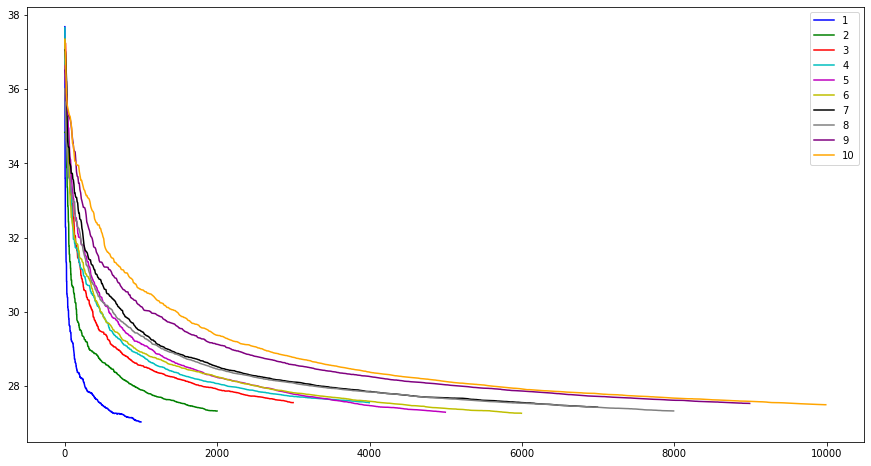

In [240]:
mini = [i+1 for i in range(10)]

plt.figure(figsize=(15,8))
C = 0.03
gamma = 0.5
color = ['b','g','r','c','m','y','k','grey','purple','orange']
beta_true = ds.beta
plt.figure(figsize=(15,8))
for num in range(10):
    m = mini[num]
    betas,losses = grad_descent(X,y,T,m,C,gamma)
    perf = [np.sum((beta- beta_true)**2) for beta in betas]
    plt.plot(np.arange(T)*m, perf, label=str(m),color = color[num])

plt.legend()

<Figure size 1080x576 with 0 Axes>

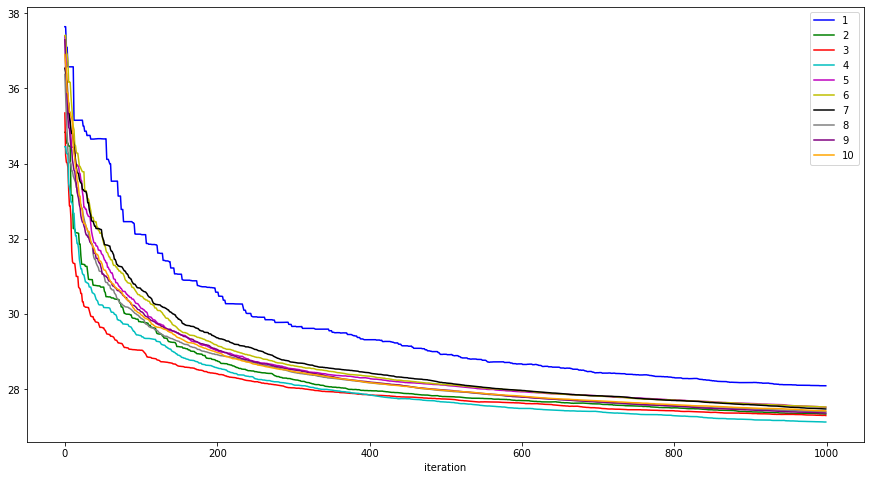

In [246]:
mini = [i+1 for i in range(10)]

plt.figure(figsize=(15,8))
C = 0.03
gamma = 0.5
color = ['b','g','r','c','m','y','k','grey','purple','orange']
beta_true = ds.beta
plt.figure(figsize=(15,8))
for num in range(10):
    m = mini[num]
    betas,losses = grad_descent(X,y,T,m,C,gamma)
    perf = [np.sum((beta- beta_true)**2) for beta in betas]
    plt.plot(np.arange(T), perf, label=str(m),color = color[num])
plt.xlabel('iteration')
plt.legend()

Notice that in this case, the minibatch size doesn't make huge differences. The learning schedule have to be small enough, nor the convergence will not hold. The model with large learning schedule converges more quickly but it is not stable. The smaller the size of minibatch is, the faster the models converge when they use the same number of data. But, smaller batch makes the result unstable.

__Exercise 4.__ (50 pts) 

Text data can be converted into vector data through a vectorization operation.  A corpus is a collection of documents and the dictionary is all of the words in the corpus.  Bag-of-words models will treat each document as a set of words, ignoring the order of the words.  Then a simple vectorizer will let $X_{i,j}$ be the number of times the $j$th word is in the $i$th document.  Two vectorizers are ``sklearn.feature_extraction.text.CountVectorizer`` and ``sklearn.feature_extraction.text.TfidfVectorizer``.

Below is an import of a reuters dataset.  I have written a def to process a single file.  Construct a response variable that has three categories, if the topic is 'earn', 'acq', or another category.  Import all of the data and construct two sparse vectorized matrices---look at ``scipy.sparse``---based on the two above vectorizations.  Use sklearn svm.SVC on the TRAIN split and predict on the TEST split.  Plot your ROC and PR curves for predicting 'earn' (versus everything else); tune the kernel and C parameters.  Do the same for predicting 'acq' versus everything else.  Write a paragraph summarizing the performance and tuning.

In [2]:
from lxml import html, etree

In [3]:
reu = html.parse("reuters/reut2-000.sgm") #You will have to do this for all sgm files here

In [4]:
import nltk
nltk.download()
# Download Corpora -> stopwords, Models -> punkt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [5]:
def parse_reu(reu):
    """Parses the etree object and returns a list of dictionary of reuters attr
    Output: {'topics': the topic of the article, 'places': where it is located, 
        'split': training/test split, 'body':the text of the article as a set of words with stopwords removed}
    """
    root= reu.getroot()
    articles = root.body.getchildren()
    stop_words = set(stopwords.words('english'))
    reu_pl = []
    for a in articles:
        reu_parse = {}
        if a.attrib['topics'] != 'YES':
            next
        topics = a.find('topics').findall('d')
        if topics:
            reu_parse['topics'] = [t.text for t in topics]
        else:
            reu_parse['topics'] = []
        places = a.find('places').findall('d')
        if places:
            reu_parse['places'] = [t.text for t in places]
        reu_parse['split'] = a.attrib['lewissplit']
        rtxt = a.find('text')
        word_tokens = word_tokenize(rtxt.text_content())
        filtered_sentence = set([w.lower() for w in word_tokens if not w in stop_words])
        reu_parse['body'] = filtered_sentence
        reu_pl.append(reu_parse)
    return reu_pl

In [6]:
reu_pl = parse_reu(reu)

In [7]:
print(reu_pl[0]['topics'])
" ".join(reu_pl[0]['body'])

['cocoa']


'booked ports open selling 4,450 oct/dec processors 6.4 exporters named available march period 4,340 6.13 hundred spot 6.2 1,870 4,351 fit arroba limited offer covertible temporao buyers - part prices also levels farmers held rose early reuter 45 figures january 22 late bags bean 350 middlemen +bahia 26 salvador 5.81 dlrs old destinations come shipment thousand 60 almost registered drought 4,415 0.39 4,480 arrivals again february uruguay consignment earlier harvesting the means cake brazilian sold since throughout sept argentina superior+ currently weeks 1.06 4,400 fob smith dec there light 753 export 2.27 2,375 stage still aug/sept 27 tonne may with 15 carnival year alleviating 35 weekly estimated 1,850 final restored 155,221 last bahia , 1986/87 estimates aug around 340 . commission dry practically continued routine feb said shippers convertible dificulties ended standing 1,880 1987/88 785 cumulative prospects good 995 obtaining york july 5.93 times seems total week would view 1,750 

In [11]:
reu_topic = []
reu_body = []
for i in range(10):
    reu = html.parse("reuters/reut2-00" + str(i) + ".sgm")
    reu_pl =  parse_reu(reu)
    for j in range(len(reu_pl)):
        reu_topic.append(reu_pl[j]['topics'])
        reu_body.append(" ".join(reu_pl[j]['body']))
for i in range(11,22):
    reu = html.parse("reuters/reut2-0" + str(i) + ".sgm")
    reu_pl =  parse_reu(reu)
    for j in range(len(reu_pl)):
        reu_topic.append(reu_pl[j]['topics'])
        reu_body.append(" ".join(reu_pl[j]['body']))

In [12]:
import pandas as pd
result = pd.DataFrame({'topic':reu_topic,'body':reu_body})

In [13]:
print(len(result))
result.head()

20578


,topic,body
0,[cocoa],"booked ports open selling 4,450 oct/dec proces..."
1,[],"british companies srd , plc management activit..."
2,[],"13.5 , 7.5 plan bancshares . < link assets the..."
3,[],sec falling gone 9 lynch term immediately bid ...
4,"[grain, wheat, corn, barley, oat, sorghum]",0.99 -- 3.25 vi available department 5.36 23 w...


In [14]:
text = result.loc[:, "body"]
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text)
df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df1.head()

,00,000,0000,00000,0002,0009,000s,001,0010,0013,...,zurich,zurn,zuyuan,zverev,zweig,zwermann,zy,zz,zzzz,üside
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
vectorizer2 = TfidfVectorizer()
X2 = vectorizer2.fit_transform(text)
df2 = pd.DataFrame(X2.toarray(), columns=vectorizer2.get_feature_names())
df2.head()

,00,000,0000,00000,0002,0009,000s,001,0010,0013,...,zurich,zurn,zuyuan,zverev,zweig,zwermann,zy,zz,zzzz,üside
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
label = [] 
for i in range(len(result)):
    if result.iloc[i]['topic'] == ['earn']:
        label.append(1)
    elif result.iloc[i]['topic'] == ['acq']:
        label.append(2)
    else:
        label.append(0)
y = pd.DataFrame({"label":label})

In [18]:
label1 = [] 
label2 = [] 
for i in range(len(result)):
    if result.iloc[i]['topic'] == ['earn']:
        label1.append(1)
    else:
        label1.append(0)
    if result.iloc[i]['topic'] == ['acq']:
        label2.append(1)
    else:
        label2.append(0)
y2 = pd.DataFrame({'earn':label1,"acq":label2})

In [19]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import scipy
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn import metrics

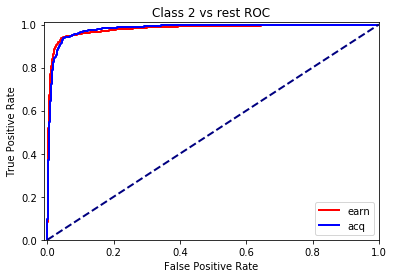

In [26]:
# for linear kernel and CountVectorizer
X_tr, X_te, y_tr, y_te = train_test_split(df1, y['label'], test_size=0.3, random_state=208)

svovr = svm.LinearSVC(multi_class = 'ovr',max_iter=2000)
svovr.fit(X_tr,y_tr)

Beta_svovr, Int_svovr = svovr.coef_, svovr.intercept_
df_ovr = svovr.decision_function(X_te)
l = 1
bin_y = (y_te == l)*1
fpr_ovr1, tpr_ovr1, _ = metrics.roc_curve(bin_y, df_ovr[:,l])
l = 2
bin_y = (y_te == l)*1
fpr_ovr2, tpr_ovr2, _ = metrics.roc_curve(bin_y, df_ovr[:,l])

def plotfun(l):
    plt.figure()
    lw = 2
    plt.plot(fpr_ovr1, tpr_ovr1,lw=lw, label="earn",color = 'red')
    plt.plot(fpr_ovr2, tpr_ovr2,lw=lw, label="acq",color = 'blue')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Class {l} vs rest ROC')
    plt.legend(loc="lower right")
    plt.show()

plotfun(l)

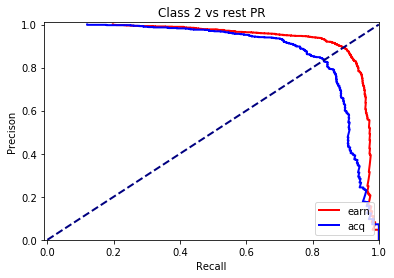

In [27]:
l = 1
bin_y = (y_te == l)*1
fpr_ovr1, tpr_ovr1, _ = metrics.precision_recall_curve(bin_y, df_ovr[:,l])
l = 2
bin_y = (y_te == l)*1
fpr_ovr2, tpr_ovr2, _ = metrics.precision_recall_curve(bin_y, df_ovr[:,l])

def plotfun(l):
    plt.figure()
    lw = 2
    plt.plot(fpr_ovr1, tpr_ovr1,lw=lw, label="earn",color = 'red')
    plt.plot(fpr_ovr2, tpr_ovr2,lw=lw, label="acq",color = 'blue')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('Recall')
    plt.ylabel('Precison')
    plt.title(f'Class {l} vs rest PR')
    plt.legend(loc="lower right")
    plt.show()

plotfun(l)

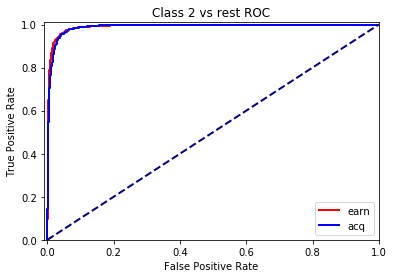

In [28]:
# for linear kernel and TfidfVectorizer
X_tr, X_te, y_tr, y_te = train_test_split(df2, y['label'], test_size=0.3, random_state=208)

svovr = svm.LinearSVC(multi_class = 'ovr',max_iter=2000)
svovr.fit(X_tr,y_tr)

Beta_svovr, Int_svovr = svovr.coef_, svovr.intercept_
df_ovr = svovr.decision_function(X_te)
l = 1
bin_y = (y_te == l)*1
fpr_ovr1, tpr_ovr1, _ = metrics.roc_curve(bin_y, df_ovr[:,l])
l = 2
bin_y = (y_te == l)*1
fpr_ovr2, tpr_ovr2, _ = metrics.roc_curve(bin_y, df_ovr[:,l])

def plotfun(l):
    plt.figure()
    lw = 2
    plt.plot(fpr_ovr1, tpr_ovr1,lw=lw, label="earn",color = 'red')
    plt.plot(fpr_ovr2, tpr_ovr2,lw=lw, label="acq",color = 'blue')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Class {l} vs rest ROC')
    plt.legend(loc="lower right")
    plt.show()

plotfun(l)

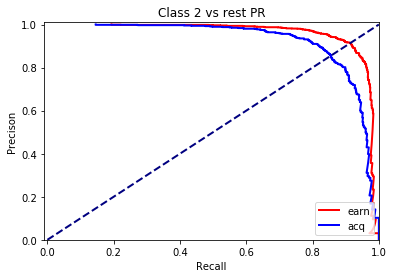

In [29]:
l = 1
bin_y = (y_te == l)*1
fpr_ovr1, tpr_ovr1, _ = metrics.precision_recall_curve(bin_y, df_ovr[:,l])
l = 2
bin_y = (y_te == l)*1
fpr_ovr2, tpr_ovr2, _ = metrics.precision_recall_curve(bin_y, df_ovr[:,l])

def plotfun(l):
    plt.figure()
    lw = 2
    plt.plot(fpr_ovr1, tpr_ovr1,lw=lw, label="earn",color = 'red')
    plt.plot(fpr_ovr2, tpr_ovr2,lw=lw, label="acq",color = 'blue')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('Recall')
    plt.ylabel('Precison')
    plt.title(f'Class {l} vs rest PR')
    plt.legend(loc="lower right")
    plt.show()

plotfun(l)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


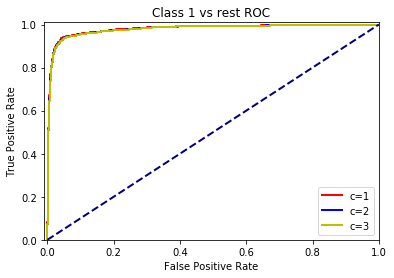

In [24]:
#Compare different kernel using the first vectorizers and "earn"
X_tr, X_te, y_tr, y_te = train_test_split(df1, y['label'], test_size=0.3, random_state=208)

svovr = svm.LinearSVC(multi_class = 'ovr',max_iter=2000)
svovr.fit(X_tr,y_tr)

Beta_svovr, Int_svovr = svovr.coef_, svovr.intercept_
df_ovr = svovr.decision_function(X_te)
l = 1
bin_y = (y_te == l)*1
fpr_ovr1, tpr_ovr1, _ = metrics.roc_curve(bin_y, df_ovr[:,l])

svovr = svm.LinearSVC(multi_class = 'ovr',max_iter=2000,C = 2)
svovr.fit(X_tr,y_tr)
Beta_svovr, Int_svovr = svovr.coef_, svovr.intercept_
df_ovr = svovr.decision_function(X_te)
fpr_ovr2, tpr_ovr2, _ = metrics.roc_curve(bin_y, df_ovr[:,l])


svovr = svm.LinearSVC(multi_class = 'ovr',max_iter=2000,C = 3)
svovr.fit(X_tr,y_tr)
Beta_svovr, Int_svovr = svovr.coef_, svovr.intercept_
df_ovr = svovr.decision_function(X_te)
fpr_ovr3, tpr_ovr3, _ = metrics.roc_curve(bin_y, df_ovr[:,l])

def plotfun(l):
    plt.figure()
    lw = 2
    plt.plot(fpr_ovr1, tpr_ovr1,lw=lw, label="c=1",color = 'red')
    plt.plot(fpr_ovr2, tpr_ovr2,lw=lw, label="c=2",color = 'blue')
    plt.plot(fpr_ovr3, tpr_ovr3,lw=lw, label="c=3",color = 'y')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Class {l} vs rest ROC')
    plt.legend(loc="lower right")
    plt.show()

plotfun(l)

I tried two methods in this problem. First, I consider 'earn', 'acq', and another category as 1,2,0 and use 1 vs rest model to get what we want. The second method is that I consider two dataset, 'earn' vs others and 'acq' vs others. However, for the second method, it takes too much time to finish computing. I don't know why.

Then, for the two different vectorizers, notice that the result are similar for the ROC plot and the PR plot.

For different value of C, we notice that the ROC is still similar.

For different kernels, we notice that the performance is similar too. I think the reason is that the matrix is so sparse that even if the linear kernel is used, the result of the performance is satisfying.

Finally, I think SVM method has a quite high computational complexity. For such a high dimension matrix, it takes much time to run the code. The model has a quite good performance when solving one vs all problem.